/home/ayush/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_21734/1380153109.py:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  b = np.math.comb(n, i) * (1 - t)**(n - i) * t**i


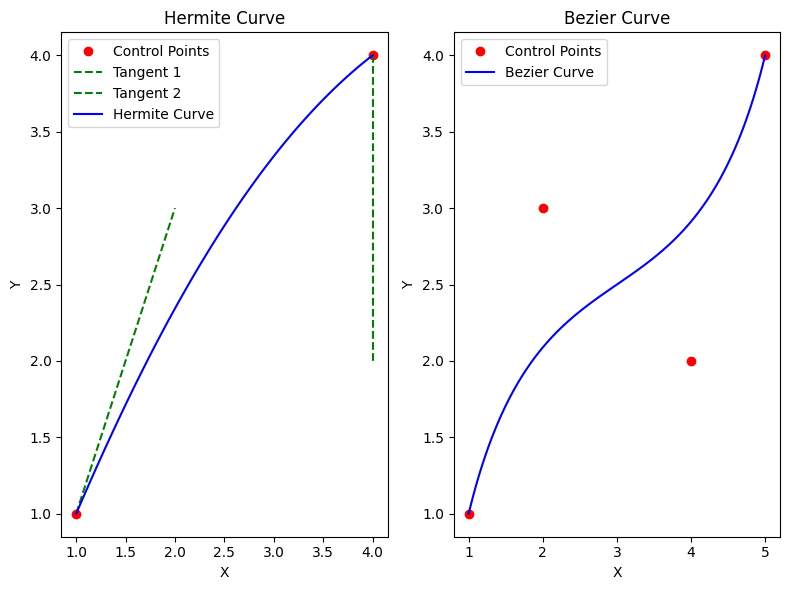

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hermite_curve(p0, p1, r0, r1, num_points=100):
    t = np.linspace(0, 1, num_points)
    h00 = 2*t**3 - 3*t**2 + 1
    h10 = t**3 - 2*t**2 + t
    h01 = -2*t**3 + 3*t**2
    h11 = t**3 - t**2

    x = h00*p0[0] + h10*r0[0] + h01*p1[0] + h11*r1[0]
    y = h00*p0[1] + h10*r0[1] + h01*p1[1] + h11*r1[1]
    
    return x, y

def bezier_curve(points, num_points=100):
    t = np.linspace(0, 1, num_points)
    n = len(points) - 1
    x, y = 0, 0
    for i in range(n + 1):
        b = np.math.comb(n, i) * (1 - t)**(n - i) * t**i
        x += points[i][0] * b
        y += points[i][1] * b
    return x, y

# Example Hermite curve
p0 = [1, 1]
p1 = [4, 4]
r0 = [2, 3]
r1 = [4, 2]
hermite_x, hermite_y = hermite_curve(p0, p1, r0, r1)

# Example Bezier curve
points = [(1, 1), (2, 3), (4, 2), (5, 4)]
bezier_x, bezier_y = bezier_curve(points)

# Plotting
plt.figure(figsize=(8, 6))

# Plot Hermite curve
plt.subplot(1, 2, 1)
plt.plot([p0[0], p1[0]], [p0[1], p1[1]], 'ro', label='Control Points')
plt.plot([p0[0], r0[0]], [p0[1], r0[1]], 'g--', label='Tangent 1')
plt.plot([p1[0], r1[0]], [p1[1], r1[1]], 'g--', label='Tangent 2')
plt.plot(hermite_x, hermite_y, 'b-', label='Hermite Curve')
plt.title('Hermite Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plot Bezier curve
plt.subplot(1, 2, 2)
plt.plot([point[0] for point in points], [point[1] for point in points], 'ro', label='Control Points')
plt.plot(bezier_x, bezier_y, 'b-', label='Bezier Curve')
plt.title('Bezier Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()